# jm_pandas test

In [1]:
## Standard Libs
from typing import Union, Optional, Tuple, Dict, Any
import warnings

# Third-Party Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rich.console import Console
from rich.text import Text
from rich.panel import Panel

# Local Libs
from jm_datascience import jm_pandas
from jm_datascience import jm_pdaccessor

In [2]:
catdf_1 = pd.Series([35, 25, 20, 12, 8], index=['Product A', 'Product B', 'Product C', 'Product D', 'Product E'])
catdf_2 = pd.Series({'Region A': 45,'Region B': 30,'Region C': 25})

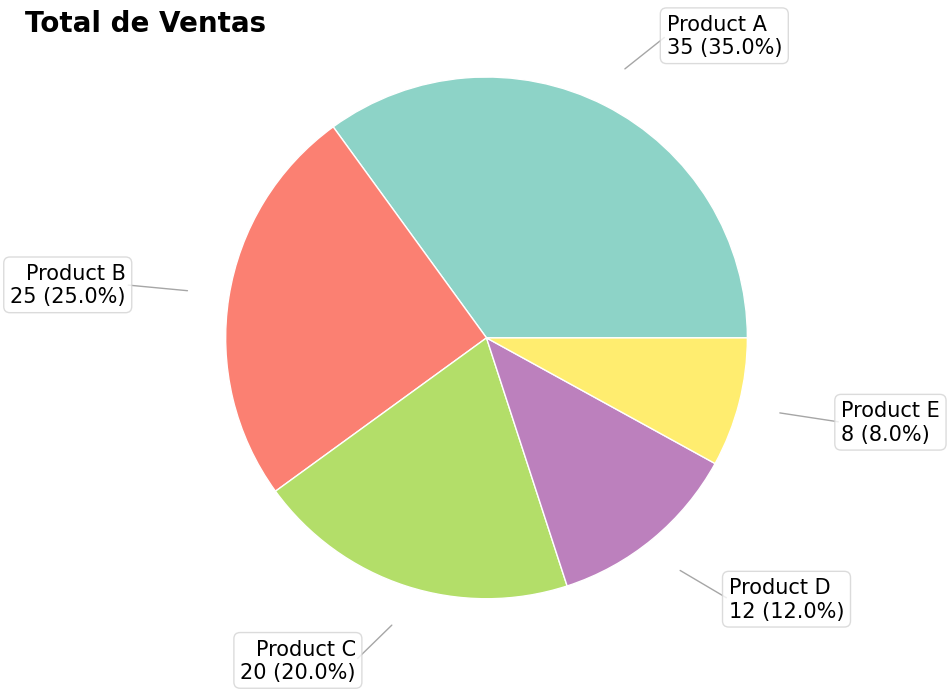

In [3]:
# fig, ax = jm_pandas.plt_piechart(catdf_1, title='Total de Ventas', rotate=-40)
fig, ax = jm_pandas.plt_piechart2(catdf_1, title='Total de Ventas')

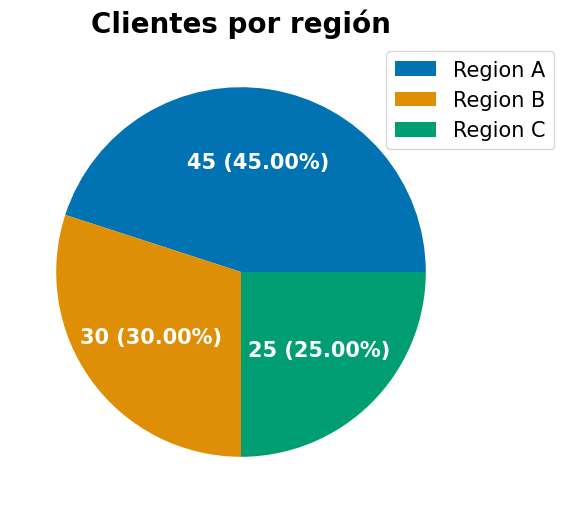

In [4]:
fig, ax = jm_pandas.plt_piechart(catdf_2, title='Clientes por región')
# fig, ax = jm_pandas.plt_piechart2(catdf_2, title='Clientes por región')

In [6]:
## import Libs for partial tests from here.
import numpy as np
import pandas as pd
from jm_datascience import jm_pdaccessor

## Read spreedsheet for tests
spreedsheet = r"C:\Users\jm\Documents\__Dev\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"    # Casa
# spreedsheet = r"D:\git\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"                         # Office

df = pd.read_excel(spreedsheet, skiprows=4, usecols='B:J,L:AA', index_col='ID')
df3 = df.jm.convert_dtypes_max()

## pd_accessor para Series y para DFs

In [7]:
df.jm.generals()
df['Age at time of purchase'].jm.generals()

{'type': 'Series',
 'shape': (267,),
 'memory_usage': 11410,
 'memory_usage_mb': 0.010881423950195312,
 'null_count': np.int64(88),
 'dtype': 'object',
 'name': 'Age at time of purchase',
 'unique_values': 47,
 'value_counts': {48: 11, 41: 8, 60: 7, 40: 6, 33: 6}}

In [9]:
# print(df.columns)
# df.jm.infomax()
# df['Age at time of purchase'].jm.infomax()
df['State'].jm.profile()
# df.jm.profile()


,Metric,Value
0,Name,State
1,Dtype,object
2,N Total,267
3,N Nulls,86
4,N Non Nulls,181
5,Pct Nulls,32.21
6,Memory Usage,15349.0
7,N Uniques,9
8,Uniqueness Ratio,0.034
9,Min Value,None


## describeplus() -> method?

In [ ]:
df.describe(include='all')
display(df.describe())
display(df['Age at time of purchase'].describe())

In [ ]:
# describeplus() para Series y para DFs
display(df3.describe())
display(df3['Age at time of purchase'].describe())
df3.jm.infomax()
df3['Age at time of purchase'].describe()


## Numeric Cols
- Basicamente todas las cols a las que les pueda calcular min() y max(), etc. Tambien porque son oject pero tiene números.

In [ ]:
## Read the data (a table) into a DF
# Useful data from row 5 to the end (row 272) -> skiprows=4 [avoid title rows, first four rows]
# Column k is empty, avoid k column -> usecols='B:J,L:AA'
# I Will take ID column as the DF index_col (because ID is unique for each operation)

spreedsheet = r"C:\Users\jm\Documents\__Dev\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"    # Casa
# spreedsheet = r"D:\git\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"                         # Office

df = pd.read_excel(spreedsheet, skiprows=4, usecols='B:J,L:AA', index_col='ID')

# df.info()
df1 = df.convert_dtypes()
df2 = df.jm.convert_dtypes_plus()
df3 = df.jm.convert_dtypes_max()
# df1.info()

In [ ]:
# df3.jm.infomax()

In [ ]:
## Distintos métodos de replace values - claude
# ----- 1. .replace() me da Warning !
# serie_str = df['Age at time of purchase'].replace(' ', np.nan)  # Warning 
# df['a1'] = df['Age at time of purchase'].replace(' ', np.nan)  # Warning 
# ----- 2. Condiciones Booleanas bajo la sintaxis df.loc[rows w/conditions, col] = value
display(df['Age at time of purchase'].isna().sum())
df_2 = df.copy()
df_2.loc[df_2['Age at time of purchase'] == ' ', 'Age at time of purchase'] = np.nan    # SII, .replace() con muchos warnings
df_2['Age at time of purchase'].isna().sum()
# ----- 2. Ventajas:    - Desventaja:

In [ ]:
# ----- 3. Usando .mask() que aplica en caso True (.where() aplica en caso Falso <- por eso solo probamos mask
display(df['Age at time of purchase'].isna().sum())
df_3 = df.copy()
df_3['Age at time of purchase'] = df_3['Age at time of purchase'].mask(df_3['Age at time of purchase'] == ' ', np.nan)
df_3['Age at time of purchase'].isna().sum()

In [ ]:
## Hay varios más. np.where() , apply -> es muy versatil ya que acepta funciones ad-hoc
# ----- 4. .apply() - puedo hacer la función tan compleja como yo quiera

def replace_spaces_by_nans(value):
    if isinstance(value, str) and value.isspace():
            return np.nan
    return value

display(df['Age at time of purchase'].isna().sum())
df_4 = df.copy()
df_4['Age at time of purchase'] = df_4['Age at time of purchase'].apply(replace_spaces_by_nans)
df_4['Age at time of purchase'].isna().sum()

In [ ]:
# ----- 5. apply() con lambda por ser my sencilla la func.
display(df['Age at time of purchase'].isna().sum())
df_5 = df.copy()
df_5['Age at time of purchase'] = df_5['Age at time of purchase'].apply(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
df_5['Age at time of purchase'].isna().sum()
# np.where() dice Claude, que es más rápido para grandes DFs.

In [ ]:
## Ejemplos de reemplazo de valores con un df ad-hoc.
df = pd.DataFrame({
    'nombre': ['Ana', 'Bob', '', 'Carlos', ' ', 'Diana'],
    'edad': [25, -1, 30, 999, 28, 22],
    'ciudad': ['Madrid', 'N/A', 'Barcelona', 'Valencia', 'unknown', 'Sevilla'],
    'salario': [50000, 0, 60000, -999, 55000, 48000]
})

print("DataFrame original:")
print(df)
print()

# =============================================================================
# 1. MÉTODO .replace() - EL MÁS VERSÁTIL
# =============================================================================

print("1. MÉTODO .replace()")
print("-" * 40)

# Reemplazar un valor específico por otro
df_1 = df.copy()
df_1['nombre'] = df_1['nombre'].replace(['', ' '], np.nan)
print("Reemplazar string vacío por NaN:")
print(df_1['nombre'])
print()

In [ ]:
# df3.info()

In [ ]:
## Convierte a Int64 si todos los tiene su parte decimal menor a 0.0000001

# to_Int64_if_small_decimal(df['M'], 0.0000001)
# df1['Price'].apply(is_decimal_part_petty)

# df1['Price'].apply(lambda x: True if x % 1 < 0.0000001 else False)
# df1['m2'] = df1['M'].dropna()
# df1['m2']
# df1['M']
if df1['Price'].apply(lambda x: True if x % 1 < 0.0000001 or pd.isna(x) else False).all():
    print('SIIII')
else:
    print('NOOOooooo....')

# df1['M'][df1['M'] == True].all()

In [ ]:
# number of ceros in decimal part
num = df1['Price'].iloc[9]
decimal_part = num % 1
# print(f"{num = } | {decimals = }")
# s = f"{num:.16f}".rstrip('0').split('.')
# print(f"{s[0] = } | {s[1] = }")

In [ ]:
stop()

In [ ]:
## Descubrimos un ' ' en ix = 5052 de la columna 'Age at time...
display(df['Age at time of purchase'].isna().sum())
display(df['Age at time of purchase'].dtype)
# display(df['Age at time of purchase'].loc[5052])
# df.loc[5052, 'Age at time of purchase'] = np.nan
# display(df['Age at time of purchase'].loc[5052])
# display(df['Age at time of purchase'].isna().sum())

## OK con lo anterior que "replace ' ' con nan" 
# Ahora veremos el pd.to_numeric( errors='coerce')
df['Age at time of purchase'] = pd.to_numeric(df['Age at time of purchase'], errors='coerce')
display(df['Age at time of purchase'].isna().sum())
display(df['Age at time of purchase'].dtype)
df['Age at time of purchase'].astype('Int64')

In [ ]:
df['Age at time of purchase'].min()

In [ ]:
# df.jm.info_cmp(df1)
df.jm.infomax()

In [ ]:
col_num_df = df.select_dtypes(include=[np.number]).columns.to_list()
col_num_df
col_num_df1 = df1.select_dtypes(include=[np.number]).columns.to_list()
col_num_df1
col_num_df == col_num_df1       # True

In [ ]:
# display(df['Age at time of purchase'].isna().sum())
# display(df['Age at time of purchase'].isnull().sum())
serie = df['Age at time of purchase'].copy()
display(serie.isnull().sum())
# s1 = serie.apply(lambda x: True if isinstance(x, (int, float)) else False)
for ix, value in df['Age at time of purchase'].items():
    if not isinstance(value, (int, float)):
        print(ix, value)

df['Age at time of purchase'].loc[3012]
df['Age at time of purchase'].loc[5052]
# print(df1['Age at time of purchase'].loc[1005])
len(serie) == len(df['Age at time of purchase'])
# serie.fillna(serie.mean())      # serie.mean() <- ERROR!!
jm_pandas.clean_df(serie)




In [ ]:
for ix, value in df['Age at time of purchase'].items():
    print(ix, value)

## Clousure for autopct

In [ ]:
console = Console()

def rich_warning(message, category, filename, lineno, file=None, line=None):
    texto = Text.assemble(
        ("[ADVERTENCIA] ", "bold yellow"),
        (f"{category.__name__}: ", "yellow"),
        (str(message), "white"),
        ("\n→ Archivo: ", "cyan"),
        (filename, "white"),
        (f", línea {lineno}", "white")
    )
    console.print(texto)

# Redirigir warnings a Rich
warnings.showwarning = rich_warning

# Emitir una advertencia
warnings.warn("Este módulo será eliminado en futuras versiones", DeprecationWarning)


In [ ]:
console = Console()

capturadas = []

def rich_capture_warning(message, category, filename, lineno, file=None, line=None):
    entrada = f"[{category.__name__}] {message} (archivo: {filename}, línea {lineno})"
    capturadas.append(entrada)

warnings.showwarning = rich_capture_warning

# Disparar algunas advertencias
warnings.warn("Esto es una advertencia genérica")
warnings.warn("Funcionalidad obsoleta", DeprecationWarning)
warnings.warn("Esto se eliminará pronto", PendingDeprecationWarning)

# Mostrar al final del script
if capturadas:
    console.print("\n[bold red]Advertencias durante la ejecución:[/bold red]")
    for advertencia in capturadas:
        console.print(Panel(advertencia, style="yellow"))

for advertencia in capturadas:
    print(advertencia)